##Medical Insurance Cost Prediction

Importing the dependencies

In [ ]:
# importing the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Data Collection

In [ ]:
# loading the data from csv file to a pandas dataframe

insurance_dataset = pd.read_csv('/content/insurance.csv')

In [ ]:
# shape of the dataset - number of rows and columns

insurance_dataset.shape

(1338, 7)

In [ ]:
# view the first 5 rows of the dataset

insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# check for null values

insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# get some information about the dataset

insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# to know the statistical value ranges of the dataset

insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Based on these insights, we get to know that there are three categorical and four numerical features in this dataset

Categorical Features :

1. sex
2. smoker
3. region

Numerical Features:

1. age
2. bmi
3. children
4. charges

 # Data Analysis

<ipython-input-14-af7dcccac273>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


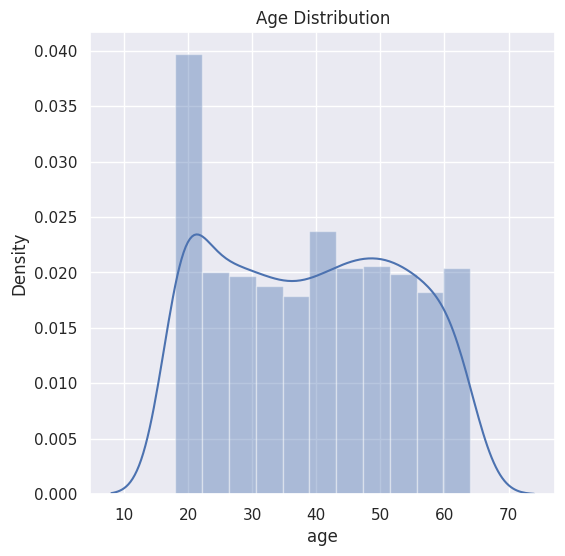

In [14]:
# finding the distribution of the age value

sns.set()
plt.figure(figsize = (6,6))
sns.distplot(insurance_dataset['age'])
plt.title("Age Distribution")
plt.show()

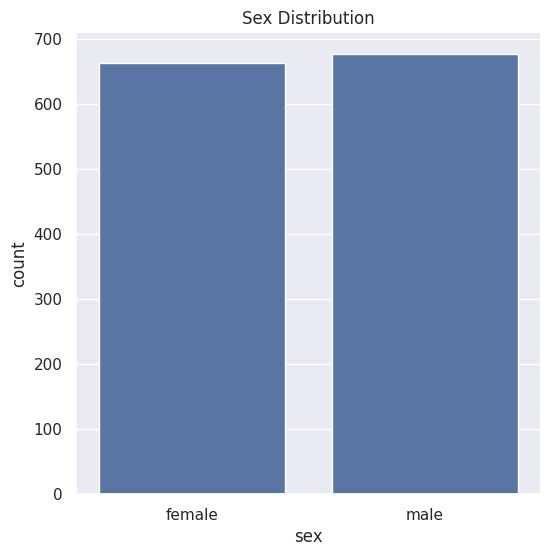

In [16]:
# using a count plot for the categorical data / features

plt.figure(figsize=(6,6))
sns.countplot(x='sex',data = insurance_dataset)
plt.title("Sex Distribution")
plt.show()

In [17]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-18-68d680ad8690>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


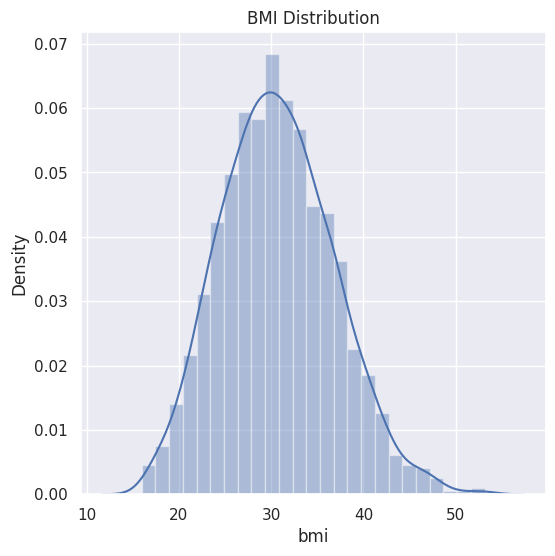

In [18]:
# using a distribution plot for bmi

plt.figure(figsize = (6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title("BMI Distribution")
plt.show()

**Normal BMI Range => 18.5 - 24.9**


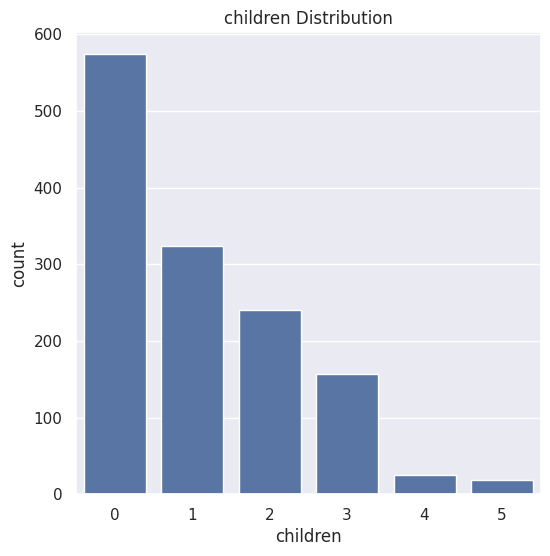

In [19]:
# using a count plot for the children data / features

plt.figure(figsize=(6,6))
sns.countplot(x='children',data = insurance_dataset)
plt.title("children Distribution")
plt.show()

In [20]:
# count the number of values

insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

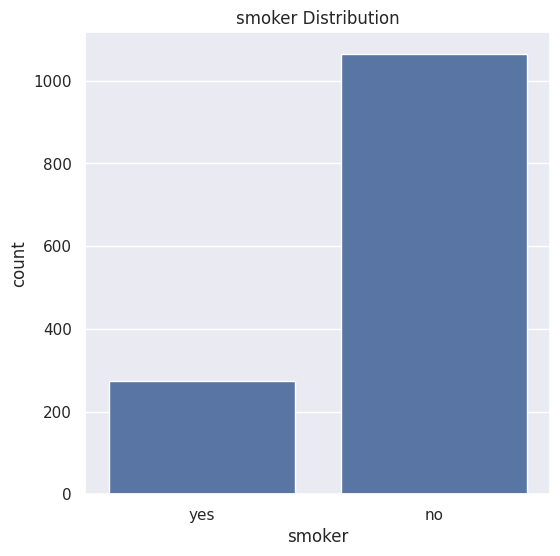

In [21]:
# analysing the smoker column using a countplot

plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data = insurance_dataset)
plt.title("smoker Distribution")
plt.show()

In [22]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

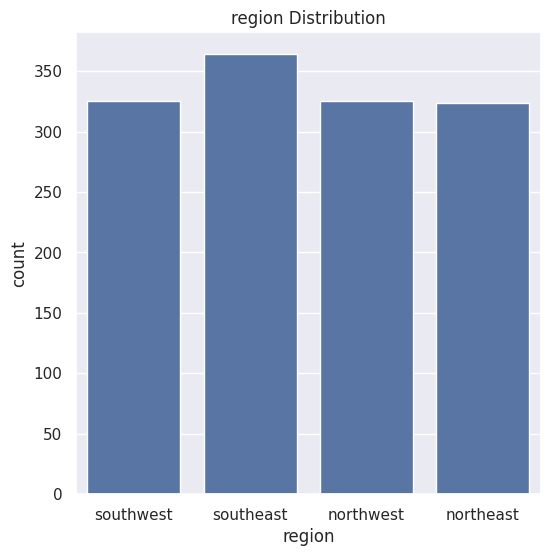

In [23]:
# understanding the region feature using a count plot

plt.figure(figsize = (6,6))
sns.countplot(x='region',data = insurance_dataset)
plt.title("region Distribution")
plt.show()

In [25]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-26-69f65f9c8d62>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


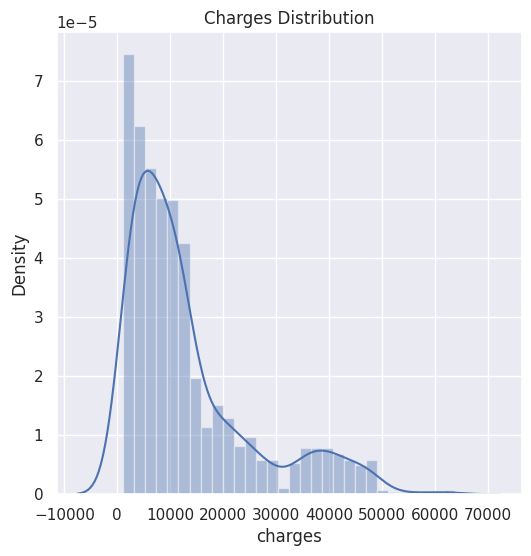

In [26]:
# understanding the ranges of charges using a distribution plot

plt.figure(figsize = (6,6))
sns.distplot(insurance_dataset['charges'])
plt.title("Charges Distribution")
plt.show()

#Data Preprocessing

- converting the text data into numerical values
This is called as Data Encoding of the categorical features

1. Converting the sex into numerical values 0 - male and 1 - female
2. Converting the smoker 0 - yes 1 - no
3. Converting the region column 'southeast' : 0, 'southwest' : 1, 'northeast' : 2, 'northwest' : 3

In [29]:
# encoding the sex column

insurance_dataset.replace({'sex' : {'male' : 0 , 'female' : 1}},inplace = True)

# encoding smoker column

insurance_dataset.replace({'smoker' : {'yes' : 0 , 'no' : 1}},inplace = True)

In [33]:
# encoding the region column

insurance_dataset.replace({'region' : {'southeast' : 0, 'southwest' : 1, 'northeast' : 2, 'northwest' : 3}},inplace = True)

In [34]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Splitting the features and targets

In [35]:
X = insurance_dataset.drop('charges',axis = 1)
Y = insurance_dataset['charges']

In [36]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [37]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into training data and testing data

In [40]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


#Model Training

Linear Regression model

In [42]:
# loading the linear regression model

regressor = LinearRegression()

In [43]:
regressor.fit(X_train, Y_train)

LinearRegression()

#Model Evaluation

In [44]:
# prediction on training data

training_data_prediction = regressor.predict(X_train)

In [45]:
# finind the R square value - lies in the range of 0 and 1
# when the value is close to 1 , the model performs well but it may differ in different cases

r2_train = metrics.r2_score(Y_train,training_data_prediction)

In [47]:
print("R square value : " ,r2_train)

R square value :  0.751505643411174


In [49]:
# prediction on test data

test_data_prediction = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print(r2_test)

0.7447273869684076


There is a concept called over test or over fitting. The values of r2 for train and test data should almost be same in order to ensure there is no overfitting

# Build a predictive system

In [52]:
input_data = (62,1,26.29,0,0,0) # charges = 27808.7251

# input_data is a tuple data type, change this into a numpy array bcoz it is easy to process

input_data_as_numpy_array = np.asarray(input_data)


# reshape this array

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print("The insurance cost in USD is ",prediction[0])

The insurance cost in USD is  35663.59657220429


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [56]:
input_data = (19,0,24.6,1,1,1) # charges = 1837.237

# input_data is a tuple data type, change this into a numpy array bcoz it is easy to process

input_data_as_numpy_array = np.asarray(input_data)


# reshape this array

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print("The insurance cost in USD is ",prediction[0])

The insurance cost in USD is  1132.661899982586


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [57]:
input_data = (55,1,32.775,2,1,3) # charges = 12268.63225

# input_data is a tuple data type, change this into a numpy array bcoz it is easy to process

input_data_as_numpy_array = np.asarray(input_data)


# reshape this array

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print("The insurance cost in USD is ",prediction[0])

The insurance cost in USD is  13917.116775271435


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
